## 2019 Diabetes Dataset Survey

Task:
    
    1. naive bayes algorithm and KNN try. Add performance metrics. Research paper minimum 5.
    2. implemntation process starts: ----> using input find whether diabetic or not 
    3. next dataset graph n relation to importance with diabetes

## About the Dataset

### Importing necessary libraries

In [1]:
import numpy as np
import seaborn as sns
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
diabetes_data = pd.read_csv("diabetes_dataset__2019.csv")

In [3]:
diabetes_data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
diabetes_data.shape

(952, 18)

In [5]:
diabetes_data.describe

<bound method NDFrame.describe of               Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    S

In [6]:
diabetes_data.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

### Column Description

In [7]:
diabetes_data['Diabetic'].value_counts()

Diabetic
no     684
yes    266
 no      1
Name: count, dtype: int64

In [8]:
#diabetes_data.groupby('Diabetic').mean()

### Imputing the NaN values

In [9]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [10]:
diabetes_imputed = pd.DataFrame(imp_mode.fit_transform(diabetes_data))
diabetes_imputed.columns = diabetes_data.columns
diabetes_imputed.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [11]:
diabetes_imputed.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [12]:
diabetes_imputed['Diabetic']

0       no
1       no
2       no
3       no
4       no
      ... 
947    yes
948    yes
949     no
950     no
951    yes
Name: Diabetic, Length: 952, dtype: object

### LABEL ENCODING

In [13]:
diabetes_imputed['Diabetic']

0       no
1       no
2       no
3       no
4       no
      ... 
947    yes
948    yes
949     no
950     no
951    yes
Name: Diabetic, Length: 952, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(diabetes_imputed['Diabetic'])

LabelEncoder()

In [17]:
diabetes_imputed['Diabetic'] = le.transform(diabetes_imputed['Diabetic'])

In [18]:
diabetes_imputed['Diabetic']

0      1
1      1
2      1
3      1
4      1
      ..
947    2
948    2
949    1
950    1
951    2
Name: Diabetic, Length: 952, dtype: int32

In [19]:
#diabetes_imputed['Diabetic'].replace('2','0', inplace=True)

In [20]:
diabetes_imputed = pd.DataFrame(diabetes_imputed)

# Drop rows where 'Column_Name' equals 'value_to_drop'
diabetes_imputed = diabetes_imputed[diabetes_imputed['Diabetic'] != 0]

# Display the modified DataFrame
print(diabetes_imputed)

              Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol Sleep SoundSleep Re

#### 1 represents a NO (Person is not diabetic)

#### 2 represents a YES (Person is diabetic)

In [21]:
set(diabetes_imputed['BMI'].tolist())

{15.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 42.0,
 45.0}

In [22]:
set(diabetes_data['BMI'].tolist())

{nan,
 15.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 42.0,
 45.0,
 nan,
 nan,
 nan}

### Printing all the unique values

In [23]:
for i in diabetes_imputed.columns:
    print("##", i , "##")
    print(set(diabetes_imputed[i].tolist()))

## Age ##
{'50-59', '40-49', '60 or older', 'less than 40'}
## Gender ##
{'Male', 'Female'}
## Family_Diabetes ##
{'no', 'yes'}
## highBP ##
{'no', 'yes'}
## PhysicallyActive ##
{'more than half an hr', 'one hr or more', 'none', 'less than half an hr'}
## BMI ##
{15.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 39.0, 40.0, 42.0, 45.0}
## Smoking ##
{'no', 'yes'}
## Alcohol ##
{'no', 'yes'}
## Sleep ##
{4, 5, 6, 7, 8, 9, 10, 11}
## SoundSleep ##
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
## RegularMedicine ##
{'o', 'no', 'yes'}
## JunkFood ##
{'very often', 'often', 'occasionally', 'always'}
## Stress ##
{'not at all', 'always', 'very often', 'sometimes'}
## BPLevel ##
{'normal', 'normal ', 'high', 'High', 'Low', 'low'}
## Pregancies ##
{0.0, 1.0, 2.0, 3.0, 4.0}
## Pdiabetes ##
{'no', '0', 'yes'}
## UriationFreq ##
{'not much', 'quite often'}
## Diabetic ##
{1, 2}


#### Separating the Labels

In [24]:
#X = diabetes_imputed.drop(columns = 'Diabetic', axis=1)
#Y = diabetes_imputed['Diabetic']

In [25]:
#print(X)

In [26]:
#print(Y)

#### where 1 represents the person is not diabetic and 2 represents the person is diabetic.

### Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
# chi_best = SelectKBest(score_func=chi2 , k = 4)
# k_best = chi_best.fit(X,Y)

In [29]:
print('Value of each column')
print('\n')
for col in diabetes_imputed.columns:
    print(col)
    print(diabetes_imputed[col].value_counts())
    unique_set = set(col)
    unique_count = len(unique_set)
    print("Count of unique values using a set:", unique_count)
    print("\n")

Value of each column


Age
Age
less than 40    487
40-49           164
50-59           156
60 or older     144
Name: count, dtype: int64
Count of unique values using a set: 3


Gender
Gender
Male      580
Female    371
Name: count, dtype: int64
Count of unique values using a set: 5


Family_Diabetes
Family_Diabetes
no     497
yes    454
Name: count, dtype: int64
Count of unique values using a set: 12


highBP
highBP
no     723
yes    228
Name: count, dtype: int64
Count of unique values using a set: 5


PhysicallyActive
PhysicallyActive
less than half an hr    336
more than half an hr    271
one hr or more          212
none                    132
Name: count, dtype: int64
Count of unique values using a set: 12


BMI
BMI
24.0    114
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0   

In [30]:
diabetes_imputed['Age'].replace('less than 40','0-40', inplace=True)

diabetes_imputed['Age'].replace('60 or older','60-99', inplace=True)

In [31]:
diabetes_imputed['Age']

0      50-59
1      50-59
2      40-49
3      50-59
4      40-49
       ...  
947     0-40
948    60-99
949    60-99
950    60-99
951    60-99
Name: Age, Length: 951, dtype: object

In [32]:
diabetes_imputed = pd.DataFrame(diabetes_imputed)

# Split the 'Full_Name' column into 'First_Name' and 'Last_Name' columns
diabetes_imputed[['Age Above', 'Age Below']] = diabetes_imputed['Age'].str.split('-', expand=True)
diabetes_imputed.drop(columns=['Age'], inplace=True)
# Display the modified DataFrame
print(diabetes_imputed)

     Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0      Male              no    yes        one hr or more  39.0      no   
1      Male              no    yes  less than half an hr  28.0      no   
2      Male              no     no        one hr or more  24.0      no   
3      Male              no     no        one hr or more  23.0      no   
4      Male              no     no  less than half an hr  27.0      no   
..      ...             ...    ...                   ...   ...     ...   
947    Male             yes     no  more than half an hr  25.0      no   
948    Male             yes    yes  more than half an hr  27.0      no   
949    Male              no    yes                  none  23.0      no   
950    Male              no    yes  less than half an hr  27.0      no   
951  Female             yes    yes        one hr or more  30.0      no   

    Alcohol Sleep SoundSleep RegularMedicine      JunkFood      Stress  \
0        no     8          6         

In [33]:
diabetes_imputed.head()

,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,Age Above,Age Below
0,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,1,50,59
1,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,1,50,59
2,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,1,40,49
3,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,1,50,59
4,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,1,40,49


In [34]:
diabetes_imputed.shape

(951, 19)

In [35]:
columns = diabetes_imputed.columns.tolist()
columns = columns[-2:] + columns[:-2]  # Move the last two columns to the start

# Reorganize the DataFrame with the new column order
diabetes_imputed = diabetes_imputed[columns]

# Display the modified DataFrame
print(diabetes_imputed)


    Age Above Age Below  Gender Family_Diabetes highBP      PhysicallyActive  \
0          50        59    Male              no    yes        one hr or more   
1          50        59    Male              no    yes  less than half an hr   
2          40        49    Male              no     no        one hr or more   
3          50        59    Male              no     no        one hr or more   
4          40        49    Male              no     no  less than half an hr   
..        ...       ...     ...             ...    ...                   ...   
947         0        40    Male             yes     no  more than half an hr   
948        60        99    Male             yes    yes  more than half an hr   
949        60        99    Male              no    yes                  none   
950        60        99    Male              no    yes  less than half an hr   
951        60        99  Female             yes    yes        one hr or more   

      BMI Smoking Alcohol Sleep SoundSl

In [36]:
diabetes_imputed.head()

,Age Above,Age Below,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50,59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,1
1,50,59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,1
2,40,49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,1
3,50,59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,1
4,40,49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,1


In [37]:
diabetes_imputed['Gender'].replace('Male','0', inplace=True)

diabetes_imputed['Gender'].replace('Female','1', inplace=True)

In [38]:
diabetes_imputed['Gender']

0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    1
Name: Gender, Length: 951, dtype: object

#### Here 0 represents Male.

#### And 1 represents Female.

In [39]:
diabetes_imputed['Family_Diabetes'].replace('no','0', inplace=True)

diabetes_imputed['Family_Diabetes'].replace('yes','1', inplace=True)

In [40]:
diabetes_imputed['Family_Diabetes']

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Family_Diabetes, Length: 951, dtype: object

#### Here 0 represents the person had no family diabetes history.

#### And 1 represents the person had family diabetes history.

In [41]:
diabetes_imputed['highBP'].replace('no','0', inplace=True)

diabetes_imputed['highBP'].replace('yes','1', inplace=True)

In [42]:
diabetes_imputed['highBP']

0      1
1      1
2      0
3      0
4      0
      ..
947    0
948    1
949    1
950    1
951    1
Name: highBP, Length: 951, dtype: object

#### 0 represents that the person does not have high BP.

#### 1 represents that the person has high BP.

In [43]:
diabetes_imputed['PhysicallyActive'].replace('none',0, inplace=True)

diabetes_imputed['PhysicallyActive'].replace('less than half an hr',1, inplace=True)

diabetes_imputed['PhysicallyActive'].replace('more than half an hr',2, inplace=True)

diabetes_imputed['PhysicallyActive'].replace('one hr or more',3, inplace=True)

In [44]:
diabetes_imputed['PhysicallyActive']

0      3
1      1
2      3
3      3
4      1
      ..
947    2
948    2
949    0
950    1
951    3
Name: PhysicallyActive, Length: 951, dtype: int64

#### Here 0 conveys that the person is not at all physically active.

#### 1 conveys that the person exercises for not more than 30 mins.

#### 2 conveys that the person exercises for more than 30 mins.

#### 3 conveys that the person exercises for more than an hour.

In [45]:
diabetes_imputed['Smoking'].replace('no','0', inplace=True)

diabetes_imputed['Smoking'].replace('yes','1', inplace=True)

In [46]:
diabetes_imputed['Smoking']

0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    0
Name: Smoking, Length: 951, dtype: object

#### 0 represents that the person is not a smoker.

#### 1 represents that the person does not smoke.

In [47]:
diabetes_imputed['Alcohol'].replace('no','0', inplace=True)

diabetes_imputed['Alcohol'].replace('yes','1', inplace=True)

In [48]:
diabetes_imputed['Alcohol']

0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    1
951    0
Name: Alcohol, Length: 951, dtype: object

#### 0 represents that the person does not drink alcohol.

#### 1 represents that the person drinks alcohol.

In [49]:
diabetes_imputed['RegularMedicine'].replace('no','0', inplace=True)
diabetes_imputed['RegularMedicine'].replace('o','0', inplace=True)

diabetes_imputed['RegularMedicine'].replace('yes','1', inplace=True)

In [50]:
diabetes_imputed['RegularMedicine']

0      0
1      1
2      0
3      0
4      0
      ..
947    0
948    1
949    1
950    1
951    1
Name: RegularMedicine, Length: 951, dtype: object

#### 0 represents that the person does not take any regular medicine or the person does not need any regular medicine.

#### 1 represents that the person takes regular medicines.

In [51]:
diabetes_imputed['JunkFood'].replace('occasionally','0', inplace=True)

diabetes_imputed['JunkFood'].replace('often','1', inplace=True)

diabetes_imputed['JunkFood'].replace('very often','2', inplace=True)

diabetes_imputed['JunkFood'].replace('always','3', inplace=True)

In [52]:
diabetes_imputed['JunkFood']

0      0
1      2
2      0
3      0
4      0
      ..
947    1
948    0
949    0
950    0
951    0
Name: JunkFood, Length: 951, dtype: object

#### 0 represents that the person occasionally consumes junk food.

#### 1 represents that the person often consumes junk food.

#### 2 represents that the person consumes junk food very often.

#### 3 represents that the person always consumes junk food only.

In [53]:
diabetes_imputed['Stress'].replace('not at all','0', inplace=True)

diabetes_imputed['Stress'].replace('sometimes','1', inplace=True)

diabetes_imputed['Stress'].replace('very often','2', inplace=True)

diabetes_imputed['Stress'].replace('always','3', inplace=True)

In [54]:
diabetes_imputed['Stress']

0      1
1      1
2      1
3      1
4      1
      ..
947    1
948    1
949    1
950    2
951    1
Name: Stress, Length: 951, dtype: object

#### 0 represents that the person does not take stress at all.

#### 1 represents that the person takes stress sometimes.

#### 2 represents that the person is very often stressed.

#### 3 represents that the person is always under a lot of tension.

In [55]:
diabetes_imputed['BPLevel'] = diabetes_imputed['BPLevel'].str.lower().str.strip()

In [56]:
diabetes_imputed['BPLevel'].replace('low',0, inplace=True)

diabetes_imputed['BPLevel'].replace('normal',1, inplace=True)

diabetes_imputed['BPLevel'].replace('high',2, inplace=True)

In [57]:
diabetes_imputed['BPLevel']

0      2
1      1
2      1
3      1
4      1
      ..
947    1
948    2
949    2
950    2
951    2
Name: BPLevel, Length: 951, dtype: int64

#### 0 represents that the person has a low Blood Pressure Level.

#### 1 represents that the person has a normal Blood Pressure Level.

#### 2 represents that the person has high Blood Pressure Level.

In [58]:
diabetes_imputed['Pdiabetes'] = diabetes_imputed['Pdiabetes'].fillna(0)

In [59]:
diabetes_imputed['Pdiabetes'].replace('no','0', inplace=True)

diabetes_imputed['Pdiabetes'].replace('yes','1', inplace=True)

In [60]:
diabetes_imputed['Pdiabetes']

0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    0
Name: Pdiabetes, Length: 951, dtype: object

In [61]:
diabetes_imputed['UriationFreq'].replace('not much','0', inplace=True)

diabetes_imputed['UriationFreq'].replace('quite often','1', inplace=True)

In [62]:
diabetes_imputed['UriationFreq']

0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    1
949    0
950    0
951    1
Name: UriationFreq, Length: 951, dtype: object

#### 0 represents that the person does not urinate much.

#### 1 represents that the person urinates quite often.

In [63]:
diabetes_imputed['Diabetic']

0      1
1      1
2      1
3      1
4      1
      ..
947    2
948    2
949    1
950    1
951    2
Name: Diabetic, Length: 951, dtype: int32

#### 1 represents that the person does not have diabetes.

#### 2 represents that the person does have diabetes.

In [64]:
diabetes_imputed['Pregancies'] = diabetes_imputed['Pregancies'].fillna(0)

In [65]:
diabetes_imputed['Pregancies']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
947    0.0
948    0.0
949    0.0
950    0.0
951    2.0
Name: Pregancies, Length: 951, dtype: float64

In [66]:
diabetes_imputed['Pregancies'] = diabetes_imputed['Pregancies'].astype(int) 

In [67]:
diabetes_imputed['BMI'] = diabetes_imputed['BMI'].astype(int) 

In [68]:
diabetes_imputed.dtypes

Age Above           object
Age Below           object
Gender              object
Family_Diabetes     object
highBP              object
PhysicallyActive     int64
BMI                  int32
Smoking             object
Alcohol             object
Sleep               object
SoundSleep          object
RegularMedicine     object
JunkFood            object
Stress              object
BPLevel              int64
Pregancies           int32
Pdiabetes           object
UriationFreq        object
Diabetic             int32
dtype: object

# Covariance relation and other stuff

In [69]:
# Calculate covariance matrix for all columns with respect to the target column
covariance_matrix = diabetes_imputed.cov()

# Calculate correlation matrix for all columns with respect to the target column
correlation_matrix = diabetes_imputed.corr()

# Calculate variance for all columns with respect to the target column
#variance = diabetes_imputed.var()

# Calculate Mean Squared Error (MSE) for each column with respect to the target column
#mse_values = ((XY.drop(columns='Diabetes_binary') - XY['Diabetes_binary'])**2).mean()

# Print the results
print("Covariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

#print("\nVariance for Each Column with Respect to Target Column:")
#print(variance)

#print("\nMean Squared Error (MSE) for Each Column with Respect to Target Column:")
#print(mse_values)


Covariance Matrix:
                   Age Above   Age Below    Gender  Family_Diabetes    highBP  \
Age Above         646.887819  425.412585  0.407726         1.431557  4.342952   
Age Below         425.412585  415.686057 -0.082670         0.665741  3.404868   
Gender              0.407726   -0.082670  0.238176         0.024092 -0.005207   
Family_Diabetes     1.431557    0.665741  0.024092         0.249752  0.013847   
highBP              4.342952    3.404868 -0.005207         0.013847  0.182461   
PhysicallyActive   -5.406519   -4.760232 -0.025932         0.003398 -0.015766   
BMI                32.350069   10.123769  0.313396         0.308211  0.336992   
Smoking            -1.570513   -1.150603 -0.044350        -0.003746 -0.001992   
Alcohol            -0.256351    0.151911 -0.062002         0.005622  0.018914   
Sleep              -3.729791   -4.425980  0.041406         0.030987 -0.038665   
SoundSleep         -1.548597   -0.815567 -0.017626         0.053840 -0.106233   
RegularMe

# Entropy

In [70]:
print('Value of each column')
print('\n')
for col in diabetes_imputed.columns:
    print(col)
    print(diabetes_imputed[col].value_counts())
    print("\n")

Value of each column


Age Above
Age Above
0     487
40    164
50    156
60    144
Name: count, dtype: int64


Age Below
Age Below
40    487
49    164
59    156
99    144
Name: count, dtype: int64


Gender
Gender
0    580
1    371
Name: count, dtype: int64


Family_Diabetes
Family_Diabetes
0    497
1    454
Name: count, dtype: int64


highBP
highBP
0    723
1    228
Name: count, dtype: int64


PhysicallyActive
PhysicallyActive
1    336
2    271
3    212
0    132
Name: count, dtype: int64


BMI
BMI
24    114
21     88
23     76
28     71
26     66
33     64
27     63
22     58
20     48
19     36
25     34
30     33
18     32
29     28
38     28
36     20
17     16
32     16
31     16
34     12
35     12
15      8
39      4
40      4
42      3
45      1
Name: count, dtype: int64


Smoking
Smoking
0    843
1    108
Name: count, dtype: int64


Alcohol
Alcohol
0    759
1    192
Name: count, dtype: int64


Sleep
Sleep
7     264
8     256
6     255
5      68
9      48
4      32
10     24
11 

In [71]:
def calc_entropy(column):
    counts=np.bincount(column) #This code will return the number of each unique value in a column
    probability=counts/(len(column))#here we calculate the probability of each value vy dividing the length of the entire column
    entropy=0#we start 0 as the intial value of entropy
    for prob in probability: # here we a for loop to go throuh each probability of each unique value in the column
        if prob >0:
            entropy += prob * math.log(prob, 2) # here calculate entropy of each value and add them to find the total emtropy
    return -entropy # we should return - * entropy due to the formula
    
    

In [72]:
print(calc_entropy(diabetes_imputed['Age Above']))
print(calc_entropy(diabetes_imputed['Age Below']))
print(calc_entropy(diabetes_imputed['Gender']))
print(calc_entropy(diabetes_imputed['Family_Diabetes']))
print(calc_entropy(diabetes_imputed['highBP']))
print(calc_entropy(diabetes_imputed['PhysicallyActive']))
print(calc_entropy(diabetes_imputed['Smoking']))
print(calc_entropy(diabetes_imputed['BMI']))
print(calc_entropy(diabetes_imputed['Alcohol']))
print(calc_entropy(diabetes_imputed['Sleep']))
print(calc_entropy(diabetes_imputed['SoundSleep']))
print(calc_entropy(diabetes_imputed['RegularMedicine']))
print(calc_entropy(diabetes_imputed['JunkFood']))
print(calc_entropy(diabetes_imputed['Stress']))
print(calc_entropy(diabetes_imputed['BPLevel']))
print(calc_entropy(diabetes_imputed['Pregancies']))
print(calc_entropy(diabetes_imputed['Pdiabetes']))
print(calc_entropy(diabetes_imputed['UriationFreq']))
print(calc_entropy(diabetes_imputed['Diabetic']))
#print(calc_entropy(Y))

1.771894230501289
1.771894230501289
0.9648741523800376
0.9985247402332957
0.7946203517383561
1.9245736608466029
0.5105753202529608
4.225379140726722
0.7256974705253365
2.3535066337348147
2.884629581903987
0.9369914854420316
1.2479002415985325
1.6040381725969848
0.9534307774587054
0.908715614259761
0.1106746364384136
0.8834650741094798
0.8550493230065987


In [73]:
diabetes_imputed.head()

,Age Above,Age Below,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50,59,0,0,1,3,39,0,0,8,6,0,0,1,2,0,0,0,1
1,50,59,0,0,1,1,28,0,0,8,6,1,2,1,1,0,0,0,1
2,40,49,0,0,0,3,24,0,0,6,6,0,0,1,1,0,0,0,1
3,50,59,0,0,0,3,23,0,0,8,6,0,0,1,1,0,0,0,1
4,40,49,0,0,0,1,27,0,0,8,8,0,0,1,1,0,0,0,1


# Information Gain

In [74]:
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

In [75]:
print(information_gain(diabetes_imputed,"Age Above","Diabetic"))
print(information_gain(diabetes_imputed,"Age Below","Diabetic"))
print(information_gain(diabetes_imputed,"Gender","Diabetic"))
print(information_gain(diabetes_imputed,"Family_Diabetes","Diabetic"))
print(information_gain(diabetes_imputed,"highBP","Diabetic"))
print(information_gain(diabetes_imputed,"PhysicallyActive","Diabetic"))
print(information_gain(diabetes_imputed,"Smoking","Diabetic"))
print(information_gain(diabetes_imputed,"BMI","Diabetic"))
print(information_gain(diabetes_imputed,"Alcohol","Diabetic"))
print(information_gain(diabetes_imputed,"Sleep","Diabetic"))
print(information_gain(diabetes_imputed,"SoundSleep","Diabetic"))
print(information_gain(diabetes_imputed,"RegularMedicine","Diabetic"))
print(information_gain(diabetes_imputed,"JunkFood","Diabetic"))
print(information_gain(diabetes_imputed,"Stress","Diabetic"))
print(information_gain(diabetes_imputed,"BPLevel","Diabetic"))
print(information_gain(diabetes_imputed,"Pregancies","Diabetic"))
print(information_gain(diabetes_imputed,"Pdiabetes","Diabetic"))
print(information_gain(diabetes_imputed,"UriationFreq","Diabetic"))

0.5387194174554975
0.5387194174554975
0.0011209174645492315
0.04873977007218255
0.09382693208841819
0.37312183077892047
5.7825267751776543e-05
0.7851736229415707
0.003047728491104462
0.3992579406635649
0.5437104395383379
0.25979697349238706
0.18622834858099768
0.3025130383972263
0.13662077569140185
0.1675895932030257
0.01574218483146861
0.007139670408989884


# drop multiple columns

In [76]:
diabetes_imputed = diabetes_imputed.drop(columns = 'BPLevel', axis=1)

### Splitting the Dataset into Diabetes and Non Diabetes.

In [77]:
diabetic_mask = diabetes_imputed['Diabetic'] == '2'
diabetic_df = diabetes_imputed[diabetic_mask]

not_diabetic_mask = diabetes_imputed['Diabetic'] == '1'
not_diabetic = diabetes_imputed[not_diabetic_mask]

In [78]:
diabetes_imputed.to_csv('diab_clean.csv', encoding='utf-8', index=False)
diabetic_clean = pd.read_csv('diab_clean.csv')
diabetic_clean['Diabetic'] = diabetic_clean['Diabetic'].fillna(1)
diabetic_clean.head()

,Age Above,Age Below,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50,59,0,0,1,3,39,0,0,8,6,0,0,1,0,0,0,1
1,50,59,0,0,1,1,28,0,0,8,6,1,2,1,0,0,0,1
2,40,49,0,0,0,3,24,0,0,6,6,0,0,1,0,0,0,1
3,50,59,0,0,0,3,23,0,0,8,6,0,0,1,0,0,0,1
4,40,49,0,0,0,1,27,0,0,8,8,0,0,1,0,0,0,1


In [79]:
not_diabetic.to_csv('not_diab_clean.csv', encoding='utf-8', index=False)
not_diabetic_clean = pd.read_csv('not_diab_clean.csv')
not_diabetic_clean['Diabetic'] = not_diabetic_clean['Diabetic'].fillna(0)
not_diabetic_clean.head()


,Age Above,Age Below,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,UriationFreq,Diabetic


In [80]:
not_diabetic_clean.shape

(0, 18)

In [81]:
frames = [diabetic_clean, not_diabetic_clean]
diabetes_clean = pd.concat(frames)
diabetes_clean.to_csv('diabetes_clean_entire.csv', encoding='utf-8', index=False)

In [82]:
diab = pd.read_csv('diab_clean.csv')
not_diab = pd.read_csv('not_diab_clean.csv')

In [83]:
print('--------- Cleaned dataset merged ---------')
print(diabetes_clean.info())

--------- Cleaned dataset merged ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age Above         951 non-null    object
 1   Age Below         951 non-null    object
 2   Gender            951 non-null    object
 3   Family_Diabetes   951 non-null    object
 4   highBP            951 non-null    object
 5   PhysicallyActive  951 non-null    object
 6   BMI               951 non-null    object
 7   Smoking           951 non-null    object
 8   Alcohol           951 non-null    object
 9   Sleep             951 non-null    object
 10  SoundSleep        951 non-null    object
 11  RegularMedicine   951 non-null    object
 12  JunkFood          951 non-null    object
 13  Stress            951 non-null    object
 14  Pregancies        951 non-null    object
 15  Pdiabetes         951 non-null    object
 16  UriationFreq      9

In [84]:
print(diabetes_clean.corr())

                  Age Above  Age Below    Gender  Family_Diabetes    highBP  \
Age Above          1.000000   0.820376  0.032848         0.112626  0.399748   
Age Below          0.820376   1.000000 -0.008308         0.065338  0.390961   
Gender             0.032848  -0.008308  1.000000         0.098781 -0.024976   
Family_Diabetes    0.112626   0.065338  0.098781         1.000000  0.064866   
highBP             0.399748   0.390961 -0.024976         0.064866  1.000000   
PhysicallyActive  -0.216279  -0.237551 -0.054062         0.006918 -0.037554   
BMI                0.235761   0.092039  0.119030         0.114315  0.146233   
Smoking           -0.194515  -0.177774 -0.286267        -0.023610 -0.014693   
Alcohol           -0.025096   0.018552 -0.316329         0.028009  0.110251   
Sleep             -0.115153  -0.170464  0.066622         0.048689 -0.071079   
SoundSleep        -0.032620  -0.021431 -0.019349         0.057719 -0.133242   
RegularMedicine    0.504847   0.479483  0.130433    

In [85]:
X = diabetes_clean.drop(columns = 'Diabetic', axis=1)

In [86]:
Y = diabetes_clean['Diabetic']

In [87]:
print(X)

    Age Above Age Below Gender Family_Diabetes highBP PhysicallyActive BMI  \
0          50        59      0               0      1                3  39   
1          50        59      0               0      1                1  28   
2          40        49      0               0      0                3  24   
3          50        59      0               0      0                3  23   
4          40        49      0               0      0                1  27   
..        ...       ...    ...             ...    ...              ...  ..   
946         0        40      0               1      0                2  25   
947        60        99      0               1      1                2  27   
948        60        99      0               0      1                0  23   
949        60        99      0               0      1                1  27   
950        60        99      1               1      1                3  30   

    Smoking Alcohol Sleep SoundSleep RegularMedicine JunkFood S

In [88]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
946    2
947    2
948    1
949    1
950    2
Name: Diabetic, Length: 951, dtype: object


In [89]:
Y.replace('2','0', inplace=True)

In [90]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
946    2
947    2
948    1
949    1
950    2
Name: Diabetic, Length: 951, dtype: object


In [114]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)

In [122]:
print(Y)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

### Splitting the dataset into Training and Testing

In [115]:
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [123]:
# function to get unique values
def unique(list1):

# initialize a null list
    unique_list = []

# traverse for all elements
    for x in list1:
# check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
# print list
    for x in unique_list:
        print (x),


# driver code
list1 = Y_train
print("the unique values from 1st list is")
unique(list1)


the unique values from 1st list is
0
1


In [124]:
X_train.head()

,Age Above,Age Below,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,UriationFreq
499,0,40,0,1,0,2,24,1,0,8,8,0,0,1,0,0,0
328,0,40,0,1,0,2,21,0,0,5,5,0,2,1,0,0,0
629,50,59,1,0,0,1,33,0,0,7,5,1,0,1,0,0,1
280,0,40,0,1,0,1,21,0,0,6,6,0,0,0,0,0,0
196,0,40,1,1,0,1,21,0,0,8,7,0,1,1,0,0,0


In [125]:
X_train.dtypes

Age Above           object
Age Below           object
Gender              object
Family_Diabetes     object
highBP              object
PhysicallyActive    object
BMI                 object
Smoking             object
Alcohol             object
Sleep               object
SoundSleep          object
RegularMedicine     object
JunkFood            object
Stress              object
Pregancies          object
Pdiabetes           object
UriationFreq        object
dtype: object

In [127]:
Y_train.astype(int)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [128]:
print(X_train.shape)

(713, 17)


In [129]:
print(X_test.shape)

(238, 17)


### Logistic Regression Model

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])
#print(X_train.shape)

[[-0.9338091  -0.65641145 -0.79237231  1.02989982 -0.55088428  0.42046652
  -0.32983744  2.75506106 -0.48989795  0.8145556   1.32424384 -0.72353595
  -0.57602648 -0.26669129 -0.39977438 -0.13083731 -0.67681438]
 [-0.9338091  -0.65641145 -0.79237231  1.02989982 -0.55088428  0.42046652
  -0.87888201 -0.36296836 -0.48989795 -1.56893882 -0.25466228 -0.72353595
   1.88329614 -0.26669129 -0.39977438 -0.13083731 -0.67681438]
 [ 1.03953379  0.2906975   1.26203299 -0.97096822 -0.55088428 -0.60622057
   1.31729628 -0.36296836 -0.48989795  0.02005746 -0.25466228  1.38210133
  -0.57602648 -0.26669129 -0.39977438 -0.13083731  1.47750997]
 [-0.9338091  -0.65641145 -0.79237231  1.02989982 -0.55088428 -0.60622057
  -0.87888201 -0.36296836 -0.48989795 -0.77444068  0.27163976 -0.72353595
  -0.57602648 -1.517684   -0.39977438 -0.13083731 -0.67681438]
 [-0.9338091  -0.65641145  1.26203299  1.02989982 -0.55088428 -0.60622057
  -0.87888201 -0.36296836 -0.48989795  0.8145556   0.7979418  -0.72353595
   0.653

In [132]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(713, 17)
(713,)
(238, 17)
(238,)


AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [133]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [134]:
y_pred_lr = classifier.predict(X_test)

In [135]:
print(y_pred_lr)

[0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [136]:
rc_lr=roc_auc_score(Y_test,y_pred_lr)
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
f1_lr = f1_score(Y_test, y_pred_lr)
auc_pr_lr = average_precision_score(Y_test, y_pred_lr)


print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("ROC AUC:", rc_lr)
print("AUC-PR:", auc_pr_lr)

Accuracy: 0.8781512605042017
Precision: 0.8225806451612904
Recall: 0.7391304347826086
F1-Score: 0.7786259541984734
ROC AUC: 0.8370208386930794
AUC-PR: 0.6836246420026637


In [137]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_lr)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[158  11]
 [ 18  51]]


In [138]:
from sklearn.metrics import accuracy_score
accu_lr=accuracy_score(Y_test, y_pred_lr)
print ("Accuracy : ", accu_lr)

Accuracy :  0.8781512605042017


In [139]:
from sklearn.metrics import precision_score
pre_lr=precision_score(Y_test, y_pred_lr)
print ("Precision : ", pre_lr)

Precision :  0.8225806451612904


In [140]:
s = pd.Series(y_pred_lr)

# random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [142]:
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
  
# performing predictions on the test dataset
y_pred_rfc = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
accu_rfc=accuracy_score(Y_test, y_pred_rfc)
print ("Accuracy : ", accu_rfc)

Accuracy :  0.9663865546218487


In [143]:
print(y_pred_rfc)

[0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]


In [144]:
#Runnung he metrics
rc_rfc=roc_auc_score(Y_test,y_pred_rfc)
accuracy_rfc = accuracy_score(Y_test, y_pred_rfc)
precision_rfc = precision_score(Y_test, y_pred_rfc)
recall_rfc = recall_score(Y_test, y_pred_rfc)
f1_rfc = f1_score(Y_test, y_pred_rfc)
auc_pr_rfc = average_precision_score(Y_test, y_pred_rfc)

#printing the Result
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-Score:", f1_rfc)
print("ROC AUC:", rc_rfc)
print("AUC-PR:", auc_pr_rfc)

Accuracy: 0.9663865546218487
Precision: 0.9295774647887324
Recall: 0.9565217391304348
F1-Score: 0.9428571428571428
ROC AUC: 0.9634679701569333
AUC-PR: 0.9017660952929855


In [145]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_rfc)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[164   5]
 [  3  66]]


In [146]:
from sklearn.metrics import precision_score

pre_rfc=precision_score(Y_test, y_pred_rfc)
print ("Precision : ", pre_rfc)

Precision :  0.9295774647887324


In [147]:
s = pd.Series(y_pred_rfc)

# SVM

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
 
# Create a non-linear kernel SVM classifier
svm = SVC(kernel='poly',degree=5, random_state=42)
svm.fit(X_train, Y_train)

SVC(degree=5, kernel='poly', random_state=42)

In [149]:
y_pred_SVM = svm.predict(X_test)

In [150]:
print(y_pred_SVM)

[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]


In [151]:
#Runnung he metrics
rc_svm=roc_auc_score(Y_test,y_pred_SVM)
accuracy_svm = accuracy_score(Y_test, y_pred_SVM)
precision_svm = precision_score(Y_test, y_pred_SVM)
recall_svm = recall_score(Y_test, y_pred_SVM)
f1_svm = f1_score(Y_test, y_pred_SVM)
auc_pr_svm = average_precision_score(Y_test, y_pred_SVM)

#printing the Result
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("ROC AUC:", rc_svm)
print("AUC-PR:", auc_pr_svm)

Accuracy: 0.8949579831932774
Precision: 0.9230769230769231
Recall: 0.6956521739130435
F1-Score: 0.7933884297520661
ROC AUC: 0.8359917674298946
AUC-PR: 0.7303757623450718


In [152]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_SVM)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[165   4]
 [ 21  48]]


In [153]:
from sklearn.metrics import precision_score
pre_svm=precision_score(Y_test, y_pred_SVM)
print("Precision : ", pre_svm)

Precision :  0.9230769230769231


In [154]:
from sklearn.metrics import accuracy_score
accu_svm=accuracy_score(Y_test, y_pred_SVM)
print ("Accuracy : ", accu_svm)

Accuracy :  0.8949579831932774


# Gradient Boost

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf_gbc.fit(X_train, Y_train)
y_pred_gbc=clf_gbc.predict(X_test)

In [156]:
#Runnung he metrics
rc_gbc=roc_auc_score(Y_test,y_pred_gbc)
accuracy_gbc = accuracy_score(Y_test, y_pred_gbc)
precision_gbc = precision_score(Y_test, y_pred_gbc)
recall_gbc = recall_score(Y_test, y_pred_gbc)
f1_gbc = f1_score(Y_test, y_pred_gbc)
auc_pr_gbc = average_precision_score(Y_test, y_pred_gbc)

#printing the Result
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1-Score:", f1_gbc)
print("ROC AUC:", rc_gbc)
print("AUC-PR:", auc_pr_gbc)

Accuracy: 0.9411764705882353
Precision: 0.9104477611940298
Recall: 0.8840579710144928
F1-Score: 0.8970588235294118
ROC AUC: 0.9242775062173055
AUC-PR: 0.8385020458540328


Confusion Matrix:
[[163   6]
 [  8  61]]


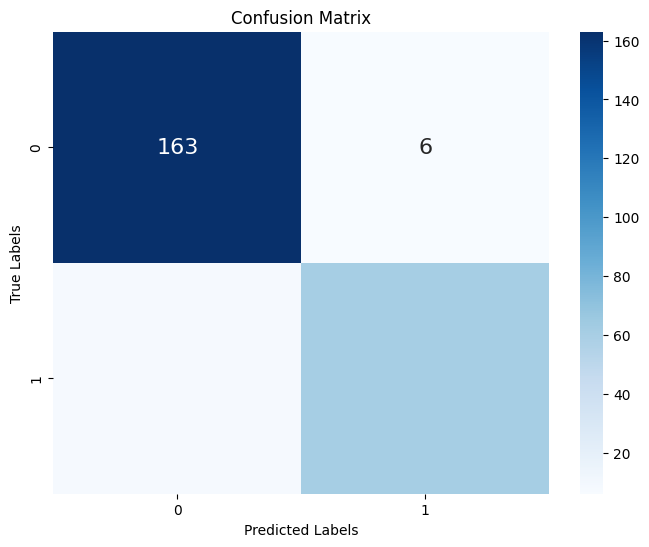

In [157]:
conf_mat_gbc = confusion_matrix(Y_test,y_pred_gbc)

print("Confusion Matrix:")
print(conf_mat_gbc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_gbc, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# DT

In [158]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=5)
clf_dt.fit(X_train, Y_train)
y_pred_dt = clf_dt.predict(X_test)

In [159]:
#Runnung he metrics
rc_dt=roc_auc_score(Y_test,y_pred_dt)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)
f1_dt = f1_score(Y_test, y_pred_dt)
auc_pr_dt = average_precision_score(Y_test, y_pred_dt)

#printing the Result
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("ROC AUC:", rc_dt)
print("AUC-PR:", auc_pr_dt)

Accuracy: 0.9705882352941176
Precision: 0.9696969696969697
Recall: 0.927536231884058
F1-Score: 0.9481481481481481
ROC AUC: 0.9578509561787154
AUC-PR: 0.9204374767034614


# RESULT METRICS

In [160]:
accu=[]
prec=[]
reca=[]
f1Sc=[]
ROCS=[]
PRSC=[]

In [161]:
accu.append(accuracy_lr)
prec.append(precision_lr)
reca.append(recall_lr)
f1Sc.append(f1_lr)
ROCS.append(rc_lr)
PRSC.append(auc_pr_lr)


accu.append(accuracy_svm)
prec.append(precision_svm)
reca.append(recall_svm)
f1Sc.append(f1_svm)
ROCS.append(rc_svm)
PRSC.append(auc_pr_svm)


accu.append(accuracy_rfc)
prec.append(precision_rfc)
reca.append(recall_rfc)
f1Sc.append(f1_rfc)
ROCS.append(rc_rfc)
PRSC.append(auc_pr_rfc)


accu.append(accuracy_gbc)
prec.append(precision_gbc)
reca.append(recall_gbc)
f1Sc.append(f1_gbc)
ROCS.append(rc_gbc)
PRSC.append(auc_pr_gbc)


#Adding to the List
accu.append(accuracy_dt)
prec.append(precision_dt)
reca.append(recall_dt)
f1Sc.append(f1_dt)
ROCS.append(rc_dt)
PRSC.append(auc_pr_dt)

#Printing the List
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8781512605042017, 0.8949579831932774, 0.9663865546218487, 0.9411764705882353, 0.9705882352941176]
[0.8225806451612904, 0.9230769230769231, 0.9295774647887324, 0.9104477611940298, 0.9696969696969697]
[0.7391304347826086, 0.6956521739130435, 0.9565217391304348, 0.8840579710144928, 0.927536231884058]
[0.7786259541984734, 0.7933884297520661, 0.9428571428571428, 0.8970588235294118, 0.9481481481481481]
[0.8370208386930794, 0.8359917674298946, 0.9634679701569333, 0.9242775062173055, 0.9578509561787154]
[0.6836246420026637, 0.7303757623450718, 0.9017660952929855, 0.8385020458540328, 0.9204374767034614]


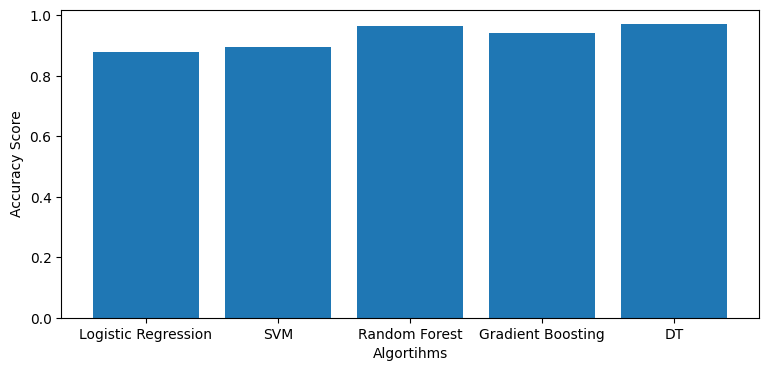

In [162]:
#Accu
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],accu,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

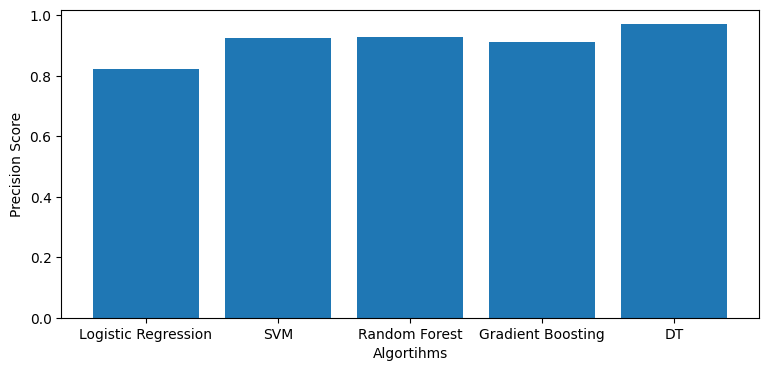

In [163]:
#Precision
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],prec,label='Precision')
plt.ylabel('Precision Score')
plt.xlabel('Algortihms')
plt.show()

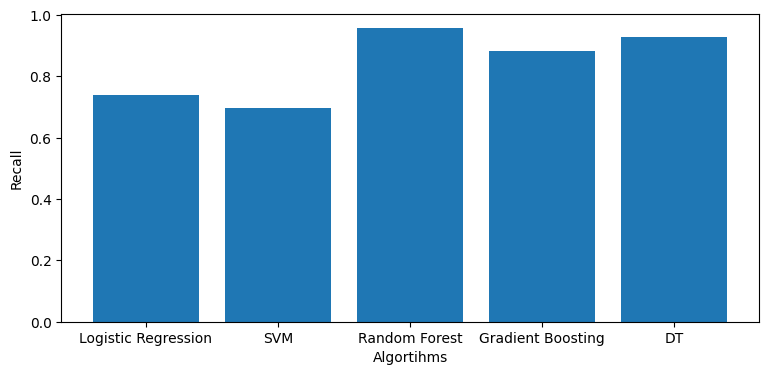

In [164]:
#Recall
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],reca,label='Recall')
plt.ylabel('Recall')
plt.xlabel('Algortihms')
plt.show()

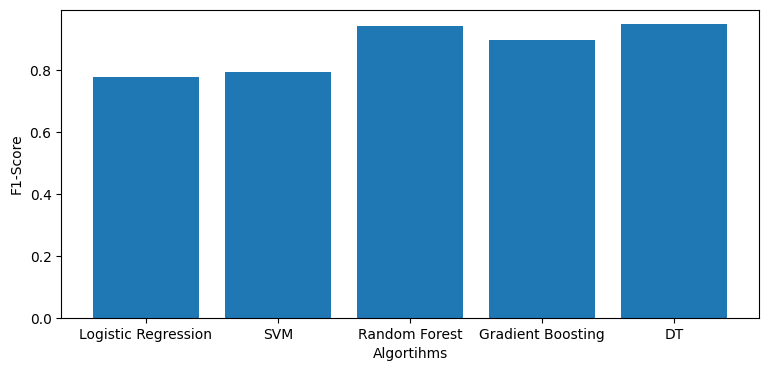

In [165]:
#F1-Score
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],f1Sc,label='F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Algortihms')
plt.show()

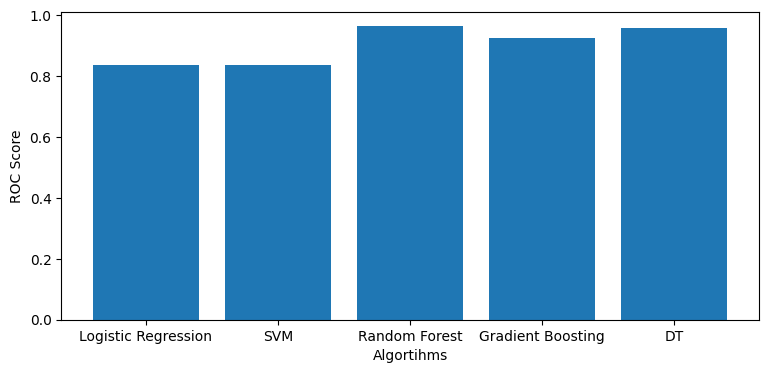

In [166]:
#ROC
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],ROCS,label='ROC')
plt.ylabel('ROC Score')
plt.xlabel('Algortihms')
plt.show()

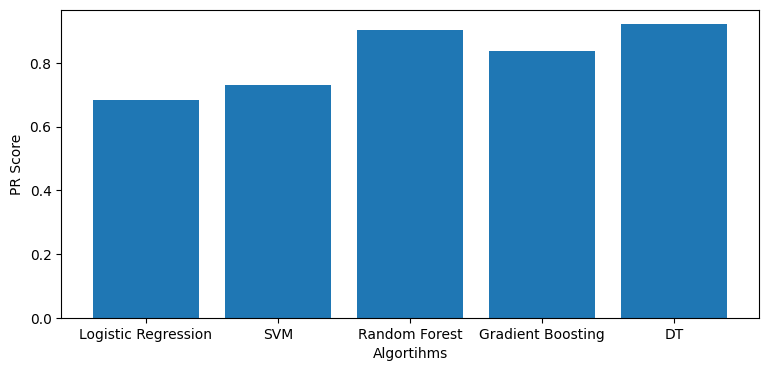

In [167]:
#PR
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],PRSC,label='PR')
plt.ylabel('PR Score')
plt.xlabel('Algortihms')
plt.show()

In [168]:
import pandas as pd
matrix = np.array([accu,prec,reca,f1Sc,ROCS,PRSC])

columns = ['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT']
index = ['accuracy','precision','recall','f1Score','ROC score','PR Score']

df = pd.DataFrame(data=matrix, columns=columns, index=index)

# Print the matrix
df.head(10)

,Logistic Regression,SVM,Random Forest,Gradient Boosting,DT
accuracy,0.878151,0.894958,0.966387,0.941176,0.970588
precision,0.822581,0.923077,0.929577,0.910448,0.969697
recall,0.739130,0.695652,0.956522,0.884058,0.927536
f1Score,0.778626,0.793388,0.942857,0.897059,0.948148
ROC score,0.837021,0.835992,0.963468,0.924278,0.957851
PR Score,0.683625,0.730376,0.901766,0.838502,0.920437


In [169]:
rounded_df = np.round(df, decimals=3)
rounded_df.head()

,Logistic Regression,SVM,Random Forest,Gradient Boosting,DT
accuracy,0.878,0.895,0.966,0.941,0.971
precision,0.823,0.923,0.930,0.910,0.970
recall,0.739,0.696,0.957,0.884,0.928
f1Score,0.779,0.793,0.943,0.897,0.948
ROC score,0.837,0.836,0.963,0.924,0.958
